### OpenCV DNN을 이용하여 SSD 기반 Object Detection 수행

#### 이미지 다운로드 및 모델 다운로드


In [1]:
import cv2

# 입력 이미지 다운로드
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

# config 파일, pretrained 가중치 다운로드
!mkdir ./pretrained
!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!wget -O ./pretrained/ssd_config_01.pbtxt  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
!tar -xvf ./pretrained/ssd_inception*.tar.gz -C ./pretrained

# 모델 불러오기
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                      '/content/pretrained/ssd_config_01.pbtxt')

--2025-03-01 13:06:51--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2025-03-01 13:06:51 (10.5 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2025-03-01 13:06:51--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.137.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781

#### coco 데이터 세트의 클래스id별 클래스명 지정.

In [2]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


#### 단일 이미지의 object detection을 함수로 생성

In [11]:
import time
import matplotlib.pyplot as plt
import cv2

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = img_array.copy()

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])

        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

Detection 수행시간: 0.16 초


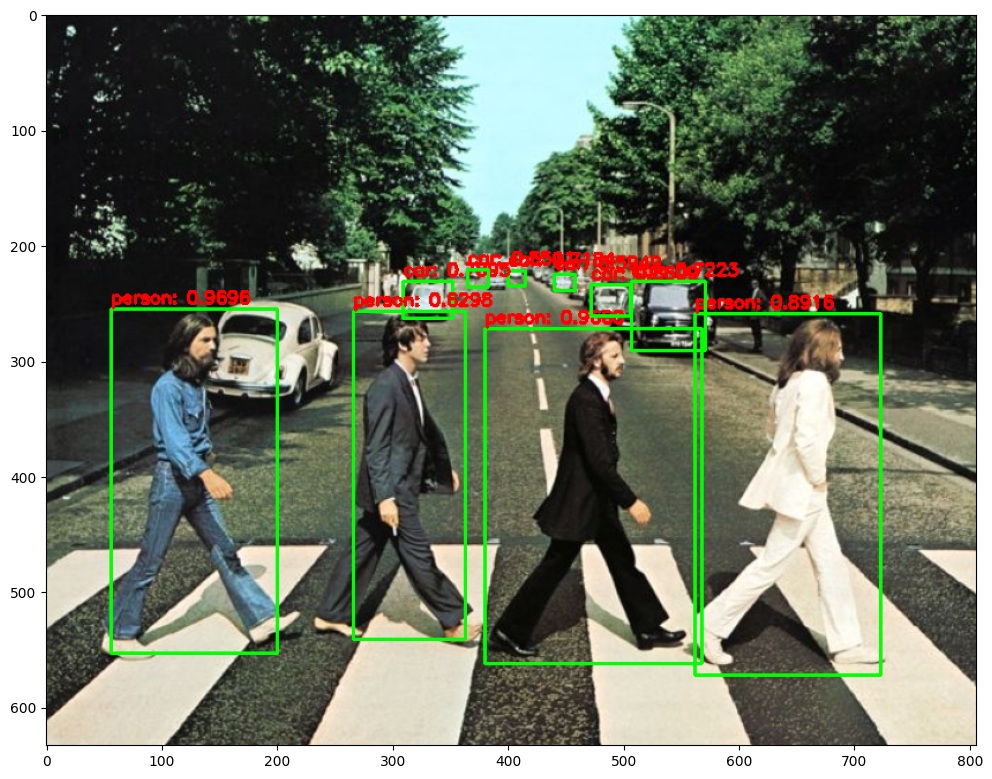

In [12]:
# image 불러오기
img = cv2.imread('/content/data/beatles01.jpg')

# Object Detetion 수행 후 시각화
draw_img = get_detected_img(cv_net, img, score_threshold=0.4, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Video Object Detection 수행

In [13]:
# 입력 영상 다운로드
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2025-03-01 13:10:07--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-03-01 13:10:08--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-03-01 13:10:08--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

#### Video Detection용 전용 함수 생성

In [14]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        returned_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [15]:
do_detected_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_incept.mp4', 0.2, False)

총 Frame 갯수: 58
Detection 수행시간: 0.28 초
Detection 수행시간: 0.3 초
Detection 수행시간: 0.28 초
Detection 수행시간: 0.29 초
Detection 수행시간: 0.28 초
Detection 수행시간: 0.29 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.2 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.17 

### SSD+Mobilenet v3 Object Detection 수행.

In [16]:
# SSD+Mobilenet v3 pretrained 모델 다운로드
!mkdir ./pretrained
!wget -O ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!wget -O ./pretrained/ssd_config_02.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
!!tar -xvf ./pretrained/ssd_mobilenet*.tar.gz -C ./pretrained

mkdir: cannot create directory ‘./pretrained’: File exists
--2025-03-01 13:11:44--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.137.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained/ssd_mo 100%[===================>]  47.03M   123MB/s    in 0.4s    

2025-03-01 13:11:45 (123 MB/s) - ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2025-03-01 13:11:45--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubu

['ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite',
 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
 'ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta',
 'ssd_mobilenet_v3_large_coco_2020_01_14/']

### opencv의 버전을 Upgrade한 후 dnn_DetectionModel() 사용.

In [17]:
# opencv 업그레이드
!pip install opencv-python==4.5.2.54

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.5.2.54 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-python==4.5.2.54


In [19]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [20]:
import time
def get_detected_img_renew(cv_net, img_array, score_threshold, is_print=True):

  draw_img = img_array.copy()

  start = time.time()

  classes, confidences, boxes = cv_net.detect(img_array, confThreshold=0.5)

  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
    if confidence_score > 0.5:
      caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
      cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
      cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
      print(caption)

  if is_print:
      print('Detection 수행시간:',round(time.time() - start, 2),"초")

  return draw_img

In [21]:
## 모델 로드하는 함수 생성.
def get_cv_detection_model(pretrained_path, config_path):
  cv_net = cv2.dnn_DetectionModel(pretrained_path, config_path)
  cv_net.setInputSize(320, 320)
  cv_net.setInputScale(1.0 / 127.5)
  cv_net.setInputMean((127.5, 127.5, 127.5))
  cv_net.setInputSwapRB(True)

  return cv_net

cv_net_m = get_cv_detection_model('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                       '/content/pretrained/ssd_config_02.pbtxt')

person: 0.7796
person: 0.7574
person: 0.7533
person: 0.7125
car: 0.6757
car: 0.6396
car: 0.5794
car: 0.5774
car: 0.5535
car: 0.5315
person: 0.5063
Detection 수행시간: 0.2 초


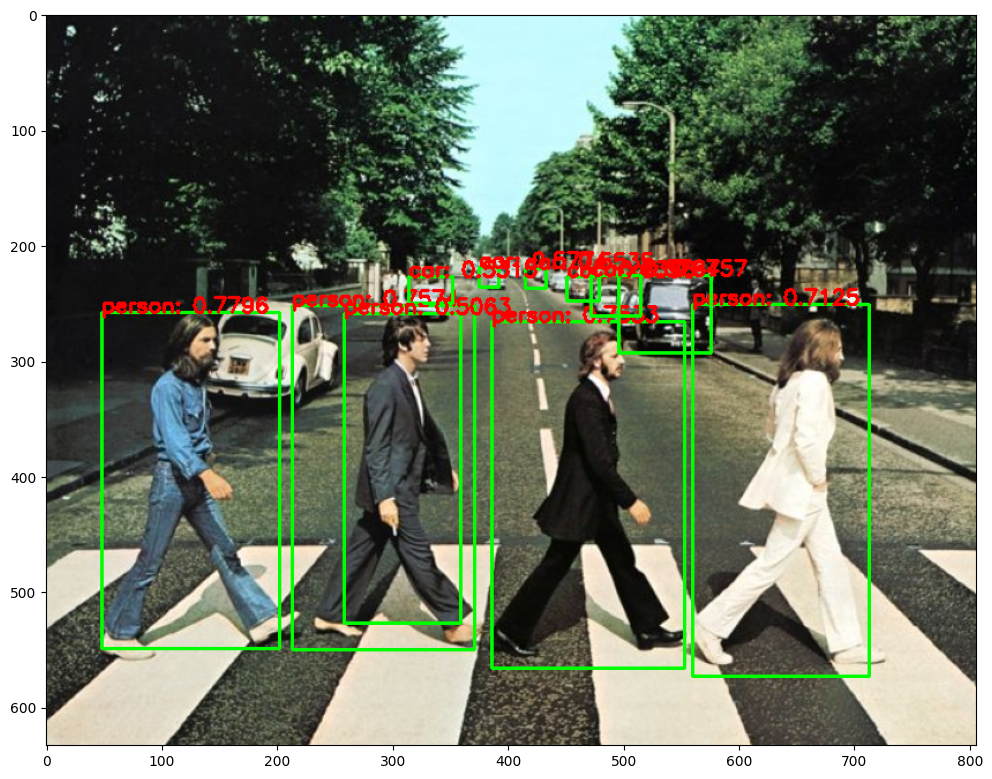

In [22]:
# 이미지 불러오기
img = cv2.imread('./data/beatles01.jpg')

# Object Detetion 수행 후 시각화
draw_img = get_detected_img_renew(cv_net_m, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Video Inferece 수행.

In [23]:
# 입력 영상 다운로드
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2025-03-01 13:17:07--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-03-01 13:17:08--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4 [following]
--2025-03-01 13:17:08--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

In [24]:
def do_detected_video_renew(cv_net, input_path, output_path, score_threshold, is_print):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        returned_frame = get_detected_img_renew(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [25]:
do_detected_video_renew(cv_net_m, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_m3.mp4', 0.2, False)

총 Frame 갯수: 58
car: 0.7007
car: 0.6426
person: 0.6268
car: 0.5965
car: 0.5591
car: 0.5143
car: 0.5111
person: 0.5018
Detection 수행시간: 0.15 초
car: 0.6978
car: 0.6462
person: 0.6340
car: 0.5995
car: 0.5576
car: 0.5123
car: 0.5123
person: 0.5040
Detection 수행시간: 0.16 초
person: 0.7225
car: 0.7070
car: 0.7001
car: 0.5805
car: 0.5615
Detection 수행시간: 0.14 초
person: 0.7266
car: 0.7232
car: 0.6871
car: 0.5425
car: 0.5372
car: 0.5029
Detection 수행시간: 0.13 초
car: 0.6832
car: 0.6009
person: 0.5702
bus: 0.5572
car: 0.5494
truck: 0.5315
Detection 수행시간: 0.13 초
person: 0.6666
car: 0.6634
car: 0.5647
car: 0.5450
bus: 0.5379
car: 0.5267
car: 0.5088
Detection 수행시간: 0.15 초
car: 0.6620
person: 0.6544
car: 0.5694
bus: 0.5468
car: 0.5366
car: 0.5303
car: 0.5074
Detection 수행시간: 0.15 초
car: 0.7102
bus: 0.6212
car: 0.5881
person: 0.5652
car: 0.5506
car: 0.5125
person: 0.5110
Detection 수행시간: 0.08 초
car: 0.6820
car: 0.6173
bus: 0.5815
person: 0.5728
car: 0.5602
Detection 수행시간: 0.07 초
car: 0.6922
car: 0.6200
bus: 0.5